In [45]:
import pandas as pd
import pyodbc
from matplotlib import pyplot as plt

In [53]:
SERVER = 'FAIZULONXY\\SQLEXPRESS'
DATABASE = 'Fezdbase2'
conn = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;')
cursor = conn.cursor()

In [54]:
tablename = 'vw_users'
sql_query = f'SELECT * FROM {tablename}'
df_data = pd.read_sql(sql_query, conn)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23984\2086937611.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data = pd.read_sql(sql_query, conn)


In [55]:
df_data

,userid,firstname,lastname,date_of_birth,gender,dept
0,1000,Tara,Murphy,1982-04-15,Male,Finance
1,1001,Sarah,Reyes,2067-04-08,Female,Quality
2,1002,Brandon,Lee,2000-01-14,Male,Quality
3,1003,Jonathan,Stone,2071-07-22,Female,Operations
4,1004,Alexandra,Lopez,1990-05-24,Male,Marketing
...,...,...,...,...,...,...
495,1495,Kari,Young,1996-02-14,Male,Marketing
496,1496,Nicolas,Gonzalez,1999-04-02,Male,Finance
497,1497,Ryan,Cruz,1998-11-08,Male,Human Resources
498,1498,Samantha,Miller,2005-12-15,Female,Marketing


In [56]:
gender_counts = df_data['userid'].groupby(df_data['gender']).count()
gender_counts

gender
Female    256
Male      244
Name: userid, dtype: int64

In [50]:
dept_counts = df_data['userid'].groupby(df_data['dept']).count()
dept_counts

dept
Finance                   81
Human Resources           84
Information Technology    89
Marketing                 83
Operations                85
Quality                   78
Name: userid, dtype: int64

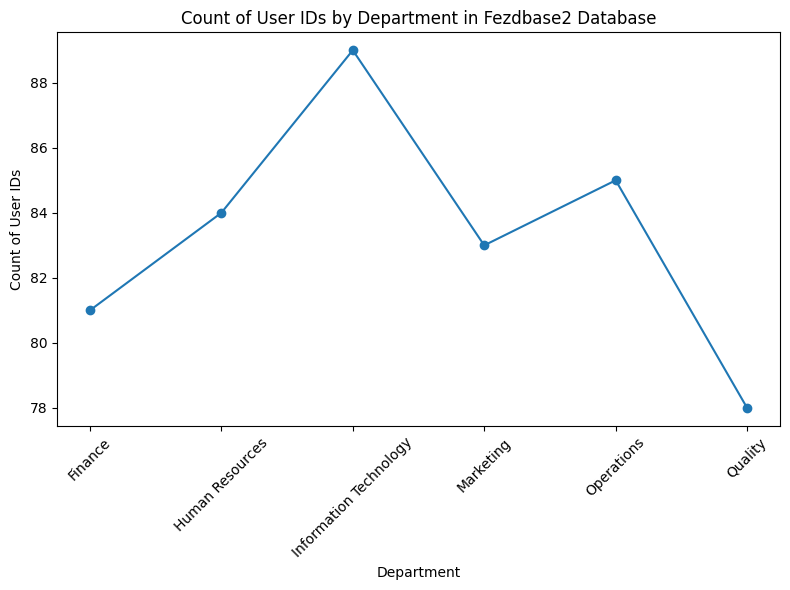

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(dept_counts.index, dept_counts.values, marker='o')
plt.ylabel('Count of User IDs')
plt.xlabel('Department')
plt.title('Count of User IDs by Department in Fezdbase2 Database')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

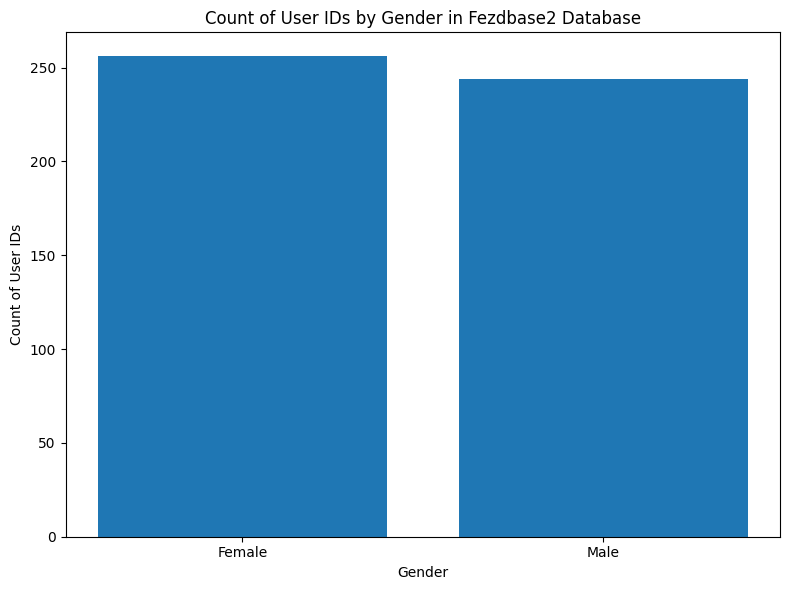

In [52]:
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.ylabel('Count of User IDs')
plt.xlabel('Gender')
plt.title('Count of User IDs by Gender in Fezdbase2 Database')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()